In [13]:
from keras.layers import  Input,Conv2D,MaxPooling2D,Flatten,Dense,Lambda,LSTM,BatchNormalization,Dropout,TimeDistributed
from keras.models import Sequential,Model,load_model
import tensorflow as tf
import keras.backend as K
import numpy as np
from keras.initializers import he_normal,glorot_normal
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,rmsprop
import tensorflow as tf
from IPython.display import SVG
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import matplotlib.pyplot as plt
import h5py
from tensorflow.examples.tutorials.mnist import input_data
mnistPath='/home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA'
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['image.cmap']='gray'
% %matplotlib inline

# First Train A LeNet for extract feature

In [3]:
def imshow(X,Y=None,classes=None):
    '''
        show Batch of image in grids sqrt(h) x sqrt(w)
        X is a numpy array,size (m,h,w,c)
        Y is a numpy array,size (m,#classes)
    '''
    m=X.shape[0]
    gridSize=int(m**0.5)
    for i in range(0,gridSize):
        for j in range(0,gridSize):
            _idx=i*gridSize+j
            im=X[_idx]
            plt.subplot(gridSize,gridSize,_idx+1)
            plt.axis('off')
            plt.imshow(im)
            if Y is not None:
                label=classes[np.argmax(Y[_idx])]
                plt.title(label)

def load_dataset(flaten=False,one_hot=True):
    def _make_one_hot(d,C=10):
        return (np.arange(C)==d[:,None]).astype(np.int32)

    mnist=input_data.read_data_sets('MNIST_DATA')
    X_train,Y_train=mnist.train.images,mnist.train.labels
    X_test,Y_test=mnist.test.images,mnist.test.labels

    if flaten==False:
        X_train=X_train.reshape((-1,28,28,1))
        X_test = X_test.reshape((-1, 28, 28,1))
    if one_hot:
        Y_train = _make_one_hot(Y_train)
        Y_test=_make_one_hot(Y_test)


    print('\n-------------------------------------------------------------------------')
    print('load %d train Example,%d Test Example'%(X_train.shape[0],X_test.shape[0]))
    print('Train Images  Shape:'+str(X_train.shape))
    print('Train Labels  Shape:' + str(Y_train.shape))
    print('Test  Images  Shape:'+str(X_test.shape))
    print('Test  Labels  Shape:' + str(Y_test.shape))
    print('-------------------------------------------------------------------------')
    return (X_train,Y_train,X_test,Y_test)

In [6]:
X_train,Y_train,X_test,Y_test=load_dataset(one_hot=True)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz

-------------------------------------------------------------------------
load 55000 train Example,10000 Test Example
Train Images  Shape:(55000, 28, 28, 1)
Train Labels  Shape:(55000, 10)
Test  Images  Shape:(10000, 28, 28, 1)
Test  Labels  Shape:(10000, 10)
-------------------------------------------------------------------------


In [7]:
def LeNet():    
    model=Sequential([
        Conv2D(filters=5,strides=1,kernel_size=5,padding='SAME',
             kernel_initializer='he_normal',activation='relu',input_shape=(28,28,1)),#28x28x5
        MaxPooling2D((2,2)),#14x14x5
        Conv2D(filters=16,strides=1,kernel_size=5,padding='SAME',
               kernel_initializer='he_normal',activation='relu'),#14x14*16
        MaxPooling2D((2,2)),#7x7*16
        Conv2D(filters=120,strides=1,kernel_size=7,padding='VALID',
               kernel_initializer='he_normal',activation='relu',name='feature'),#1x1x120
        Conv2D(filters=84,strides=1,kernel_size=1,padding='VALID',#1x1x84
               kernel_initializer='he_normal',activation='relu'),
        Conv2D(filters=10,strides=1,kernel_size=1,padding='VALID',#1x1x10
               kernel_initializer='he_normal',activation='softmax'),
        Flatten()
    ])
    model.summary()
    return model
model=LeNet()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         130       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2016      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
feature (Conv2D)             (None, 1, 1, 120)         94200     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 84)          10164     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 10)          850       
__________

In [8]:
batchSize=128
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# augment=ImageDataGenerator(horizontal_flip=True,height_shift_range=0.025,width_shift_range=0.025)
# gen=augment.flow(X_train,Y_train,batchSize)
# model.fit_generator(generator=gen,epochs=20,shuffle=True,validation_data=(X_test,Y_test))
model.fit(X_train,Y_train,batch_size=batchSize,epochs=20,shuffle=True,validation_data=(X_test,Y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 20s 361us/step - loss: 0.2740 - acc: 0.9139 - val_loss: 0.1106 - val_acc: 0.9640
Epoch 2/20
55000/55000 [==============================] - 20s 357us/step - loss: 0.0937 - acc: 0.9710 - val_loss: 0.0832 - val_acc: 0.9707
Epoch 3/20
55000/55000 [==============================] - 19s 351us/step - loss: 0.0678 - acc: 0.9789 - val_loss: 0.0541 - val_acc: 0.9831
Epoch 4/20
55000/55000 [==============================] - 19s 353us/step - loss: 0.0544 - acc: 0.9838 - val_loss: 0.0591 - val_acc: 0.9813
Epoch 5/20
55000/55000 [==============================] - 20s 360us/step - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0406 - val_acc: 0.9877
Epoch 6/20
55000/55000 [==============================] - 19s 337us/step - loss: 0.0406 - acc: 0.9881 - val_loss: 0.1010 - val_acc: 0.9753
Epoch 7/20
55000/55000 [==============================] - 19s 342us/step - loss: 0.0404 - acc: 0.9883 - val_loss: 0.

In [3]:
mnist_model_path='/home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnistSeq/outputs/mnist.h5'
# model.save(mnist_model_path)

In [4]:
model=load_model(mnist_model_path)

# Second Using above model to create a feature extractor

In [5]:
feature_model=Model(model.input,model.get_layer('feature').output)
#I freeze the extractor
for l in feature_model.layers:
    l.trainable=False
feature_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 5)         130       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2016      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
feature (Conv2D)             (None, 1, 1, 120)         94200     
Total params: 96,346
Trainable params: 0
Non-trainable params: 96,346
_________________________________________________________________


In [21]:
#feature_model can using to any size of Image
X=Input(shape=(28,28*10,1))
XY=feature_model(X)
XY


<function tensorflow.python.ops.array_ops.squeeze>

In [6]:
def SeqModel(cnn,rawNum=10,n_a=64,outdims=11,dropRate=0.8):
    '''
        a sequence to sequence model,using cnn to extract features,
        then pass features to one(Multi) RNN network
        architure:
        
          ---------------
          | softmax     |  
          ---------------         
          ---------------
          | Dense(11)    |  
          ---------------  
                 ^
                 |
          ---------------
          | Dropout(0.8) |          
          ---------------  
          ---------------
          | BatchNormal |  
          ---------------  
          ---------------
          | LSTM(64/128)|  
          ---------------  
                ^ 
                |  (1,7n-6,120)
          ---------------
          |    CNN      |  
          ---------------  
            ^
            |
        X(28,28xn,1)
        cnn：pretained CNN model,convert a Image with shape(28a,28b,1)->(7a,7b,120)
        rawNum: the Input  shape is (28,28*rawNum,1),rawNum is how many character in my train Example
        n_a:LSTM hidden units
        outdims:output dims of Seq model
        
        return:
            model: with Input X:[28,28 x rawNum,1]
                        Outputs:Y[7 x rawNum-6,outdims]
    '''
    X_Input=Input(shape=(28,28*rawNum,1),name='ImageInput')
    X=cnn(X_Input) #shape (1,7n-6,120)
    X=Lambda(lambda x:tf.squeeze(x,axis=1),name='squeeze')(X) #reshape to (7n-6,120)
        #RNN begin
    X=LSTM(n_a,return_sequences=True,name='lstm1')(X) #shape (7n-6,n_a)
    X=BatchNormalization(name='BN1')(X)
    X=Dropout(dropRate,name='dropout1')(X)
        
        #final classify 
    densor=Dense(outdims,activation='softmax')
    X=TimeDistributed(densor,name='out')(X)  #shape (7n-6,outdims)
        
        #define model
    model=Model(X_Input,X)
    return model

In [7]:
seqmodel=SeqModel(feature_model,rawNum=10,n_a=64,outdims=11,dropRate=0.8)

In [8]:
seqmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 28, 280, 1)        0         
_________________________________________________________________
model_1 (Model)              multiple                  96346     
_________________________________________________________________
squeeze (Lambda)             (None, 64, 120)           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 64, 64)            47360     
_________________________________________________________________
BN1 (BatchNormalization)     (None, 64, 64)            256       
_________________________________________________________________
dropout1 (Dropout)           (None, 64, 64)            0         
_________________________________________________________________
out (TimeDistributed)        (None, 64, 11)            715       
Total para

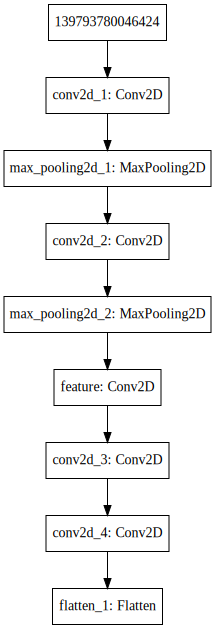

In [9]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

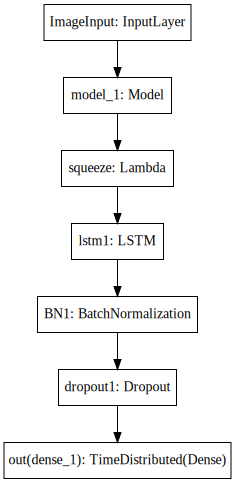

In [10]:
SVG(model_to_dot(seqmodel).create(prog='dot', format='svg'))

# Now Prepare Data For Train,do not forget using oneHot representation

In [11]:
seqDataPath='/home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnistSeq/'
def loadSeqData(onehot=True):
    def _loadF(f):
        hf=h5py.File(f,'r')
        X=np.array(hf.get('X'))
        Y=np.array(hf.get('Y'))
        hf.close()
        return X,Y
    X_train,Y_train=_loadF(seqDataPath+'mnistSeq55k.h5')
    X_test,Y_test=_loadF(seqDataPath+'mnistSeq10k.h5')
    if(onehot):
        Y_train=to_categorical(Y_train,11)
        Y_test=to_categorical(Y_test,11)
    print('\n-------------------------------------------------------------------------')
    print('load %d train Example,%d Test Example'%(X_train.shape[0],X_test.shape[0]))
    print('Train Images  Shape:'+str(X_train.shape))
    print('Train Labels  Shape:' + str(Y_train.shape))
    print('Test  Images  Shape:'+str(X_test.shape))
    print('Test  Labels  Shape:' + str(Y_test.shape))
    print('-------------------------------------------------------------------------')
    return (X_train,Y_train,X_test,Y_test)

In [12]:
X_train,Y_train,X_test,Y_test=loadSeqData(onehot=True)


-------------------------------------------------------------------------
load 55000 train Example,10000 Test Example
Train Images  Shape:(55000, 28, 280, 1)
Train Labels  Shape:(55000, 64, 11)
Test  Images  Shape:(10000, 28, 280, 1)
Test  Labels  Shape:(10000, 64, 11)
-------------------------------------------------------------------------


# Train Model

In [15]:
outputModelPath='/home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnistSeq/outputs/mnistSeq.h5'
def monitorLearning():
    def myLearnRateScheduler(epoch,lr):
        print('ecpch:%d,learn rate %f'%(epoch,lr))
        return lr
    lr_scheduler=LearningRateScheduler(myLearnRateScheduler)
    checkpoint=ModelCheckpoint(outputModelPath,monitor='val_acc',save_best_only=True,verbose=1)
    reduceOnpleateau=ReduceLROnPlateau(monitor='val_loss',min_delta=5e-6,factor=0.9,verbose=1,patience=5)
    return [lr_scheduler,checkpoint,reduceOnpleateau]


In [18]:
seqmodel.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
seqmodel.fit(X_train,Y_train,epochs=20,batch_size=64,validation_data=(X_test,Y_test),callbacks=monitorLearning())

Epoch 1/20
ecpch:0,learn rate 0.001000
55000/55000 [==============================] - 118s 2ms/step - loss: 1.2401 - acc: 0.6342
Epoch 2/20
ecpch:1,learn rate 0.001000
55000/55000 [==============================] - 120s 2ms/step - loss: 1.0049 - acc: 0.6780
Epoch 3/20
ecpch:2,learn rate 0.001000
55000/55000 [==============================] - 117s 2ms/step - loss: 0.9689 - acc: 0.6811
Epoch 4/20
ecpch:3,learn rate 0.001000
13888/55000 [======>.......................] - ETA: 1:27 - loss: 0.9505 - acc: 0.6830

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:432: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:1043: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: acc,lr,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


KeyboardInterrupt: 